## 图像特征点检测

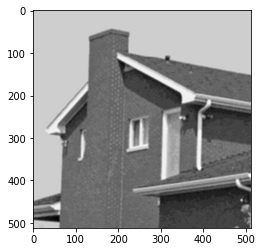

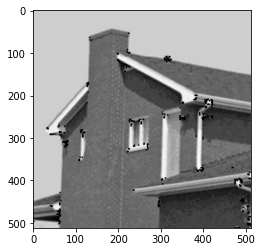

In [1]:
import cv2
import numpy as np
from  matplotlib import pyplot as plt
%matplotlib inline

def cvshow(img):
    cv2.imshow('img', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def show(img):
    if img.ndim == 2:
        plt.imshow(img,cmap="gray")
    elif img.ndim == 3:
        plt.imshow(img)
    plt.show()
#---------Harris
img = cv2.imread('images/house.tif', 0)
show(img)
gray = np.float32(img)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
img[dst>0.01*dst.max()]=0
show(img)

## SIFT特征点
#### Important NOTE:  opencv-contrib-python

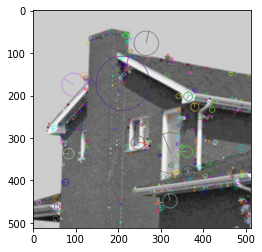

In [2]:

img = cv2.imread('images/house.tif')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
img=cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
show(img)

### 特征匹配和前景图拼接

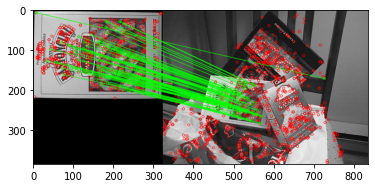

(<matplotlib.image.AxesImage at 0x1eec989a880>, None)

In [6]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img1 = cv.imread('cvdata/box.png',0)          # queryImage
img2 = cv.imread('cvdata/box_in_scene.png',0) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params) #快速近邻查找匹配特征算法
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()


In [19]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img1 = cv.imread('images/stitch1.jpg')          # queryImage
img2 = cv.imread('images/stitch2.jpg') # trainImage
cvshow(img1)
cvshow(img2)
stitcher = cv2.Stitcher_create(cv2.Stitcher_PANORAMA)
(_result, pano) = stitcher.stitch((img1, img2))
cvshow(pano)

# 手动方式请参考下面资料
#https://kushalvyas.github.io/stitching.html
#https://github.com/kushalvyas/Python-Multiple-Image-Stitching